In [3]:
pip install insightface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 20.9 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1054124 sha256=0e42fea6d7410c229236f9e173b11bfb08db2e285acd323af0a30bec51388e04
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [18]:
pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00


In [4]:
pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00


In [10]:
import cv2
from insightface.app import FaceAnalysis
import torch

In [98]:
app=FaceAnalysis(name="buffalo_l",providers=['CUDAExecutionProvider','CPUExecutionProvider'])
app.prepare(ctx_id=0,det_size=(640,640))
image=cv2.imread("/content/me1.jpg")
image.shape



Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


(1027, 827, 3)

In [99]:
faces=app.get(image)

In [100]:
faceid_embeds= torch.from_numpy(faces[0].normed_embedding).unsqueeze(0)


In [5]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.5 MB/s eta 0:00:00


In [15]:
from diffusers import StableDiffusionPipeline ,DDIMScheduler,AutoencoderKL


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [16]:
from PIL import Image


In [8]:
pip install ip_adapter


In [9]:
pip install accelerator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 8.6 MB/s eta 0:00:00


In [19]:
from ip_adapter.ip_adapter_faceid import IPAdapterFaceID

In [20]:
base_model_path="SG161222/Realistic_Vision_V4.0_noVAE"
# vae_model_path="stabilityai/sd-vae-ft-mse"
vae_model_path="stabilityai/sd-vae-ft-mse"
ip_ckpt = "/content/drive/MyDrive/ip-adapter-faceid_sd15.bin"
device="cuda"
lora_ckpt = "ip-adapter-faceid_sd15_lora.safetensors"


noise_scheduler=DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)



In [21]:
vae=AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)
pipe=StableDiffusionPipeline.from_pretrained(base_model_path,torch_dtype=torch.float16,scheduler=noise_scheduler,vae=vae,feature_extractor=None,
                                             safety_checker=None)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [32]:
pip install accelerate

In [23]:
ip_model=IPAdapterFaceID(pipe,ip_ckpt,device)
# pipe.load_lora_weights(lora_ckpt)
# pipe.fuse_lora


In [116]:
prompt= "A man in space with head upwards with full of stars in background ,in cinematic aesthetic"

negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, blurry"


In [117]:
images=ip_model.generate(prompt=prompt,negative_prompt=negative_prompt,faceid_embeds=faceid_embeds,num_samples=5,width=512,height=512, num_inference_steps=40,seed=2023)

  0%|          | 0/40 [00:00<?, ?it/s]

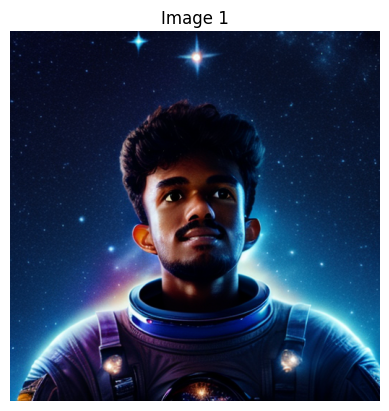

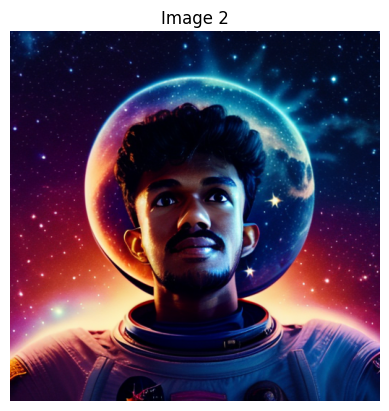

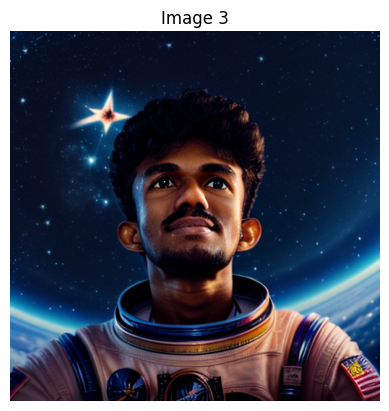

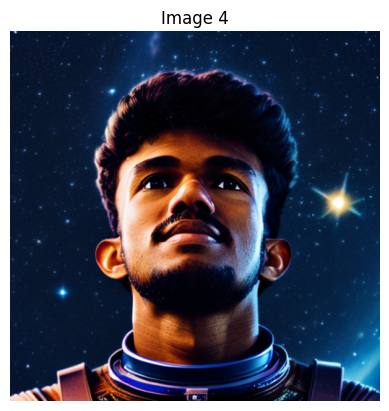

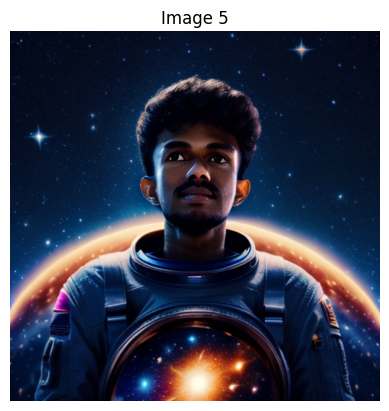

In [119]:
# torch.cuda.empty_cache()
import matplotlib.pyplot as plt
from PIL import Image

# Convert tensors to PIL Images and display them
for i, img_tensor in enumerate(images):
    # Convert the tensor to a PIL Image
    # img_tensor = torch.from_numpy(img_tensor)

    # img = Image.fromarray(img_tensor.permute(1, 2, 0).cpu().numpy())

    # Display the image
    plt.figure()
    plt.imshow(img_tensor)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    plt.show()

